# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/us_indicators.csv')
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['year'] = df['date'].dt.year

In [3]:
df

,date,cpi,policy_rate,neer,money_supply,inflation_target,type_of_monetary_policy,year
0,2001-01-31,1.32,1.5,89.24,147.07,inrange,ease,2001
1,2001-02-28,1.44,1.5,90.47,145.49,inrange,ease,2001
2,2001-03-31,1.44,1.5,89.33,140.02,inrange,ease,2001
3,2001-04-30,2.52,1.5,87.32,138.88,inrange,ease,2001
4,2001-05-31,2.76,1.5,87.16,139.49,inrange,ease,2001
...,...,...,...,...,...,...,...,...
277,2024-02-29,-0.77,2.5,118.51,718.27,outrrange,tight,2024
278,2024-03-31,-0.47,2.5,118.11,711.58,outrrange,tight,2024
279,2024-04-30,0.19,2.5,116.80,695.69,outrrange,tight,2024
280,2024-05-31,1.54,2.5,117.21,702.68,inrange,tight,2024


## Analysis

### Display the descriptive statistics

Mean of cpi and policy rate is around 2 % which is not surprised because the inflation target band is 1 - 3% the midpoint is 2%.  
The inflation target is set by BOT.

In [4]:
df.describe()

,date,cpi,policy_rate,neer,money_supply,year
count,282,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2012-10-14 19:39:34.468084992,1.987624,2.035461,103.934220,432.494929,2012.255319
min,2001-01-31 00:00:00,-4.360000,0.500000,85.840000,138.870000,2001.000000
25%,2006-12-07 18:00:00,0.425000,1.500000,94.317500,237.987500,2006.000000
50%,2012-10-15 12:00:00,1.755000,1.750000,102.730000,470.675000,2012.000000
75%,2018-08-23 06:00:00,3.230000,2.500000,114.322500,613.550000,2018.000000
max,2024-06-30 00:00:00,9.160000,5.000000,126.920000,765.730000,2024.000000
std,NaN,2.188279,1.044849,11.502054,202.217172,6.799000


### Plot CPI overtime

Check the time series of CPI, it is not a trend, this may because the policy maker handle the inflation all the time.  
For example, when it is too high, the policy maker may increase the rate.

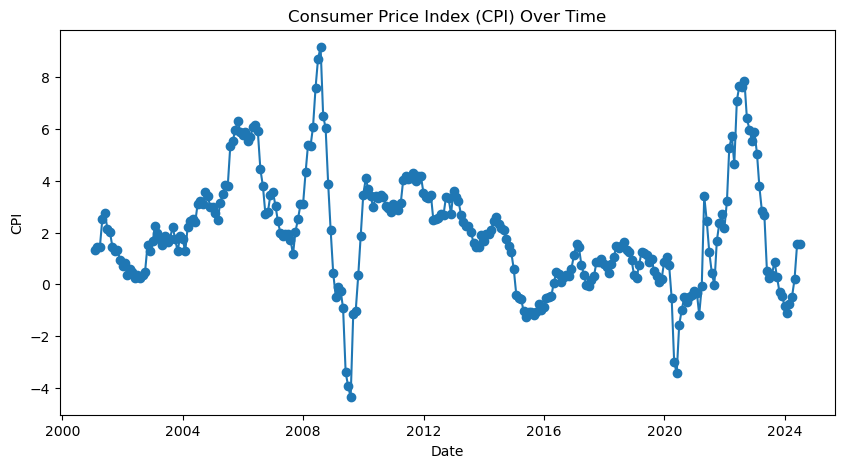

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['cpi'], marker='o', linestyle='-')
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.show()

### Plot Policy Rate overtime

Check the time series of Policy rate, it is not a trend, this may because the policy maker handle the inflation all the time.  
For example, when it is too high, the policy maker may increase the rate.

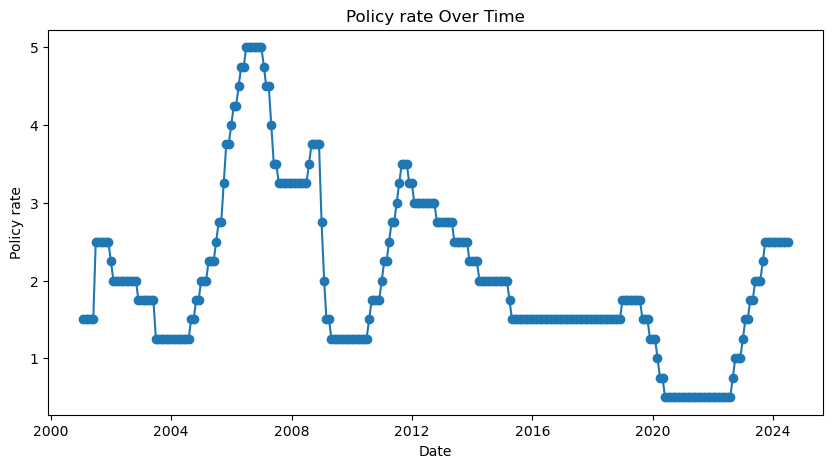

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['policy_rate'], marker='o', linestyle='-')
plt.title('Policy rate Over Time')
plt.xlabel('Date')
plt.ylabel('Policy rate')
plt.show()

### Plot NEER overtime

Check the time series of NEER, it is a trend, this may because the policy maker give the importance of currency.  
And Thailand is the export country, so we can see stronger trend in NEER.

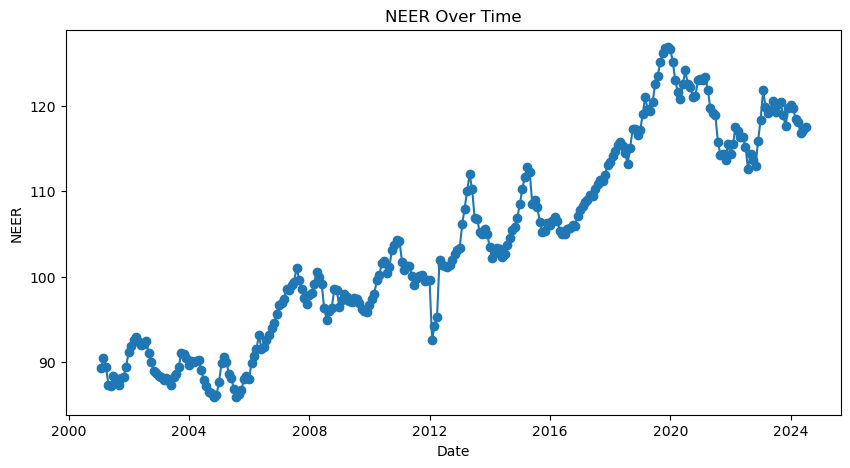

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['neer'], marker='o', linestyle='-')
plt.title('NEER Over Time')
plt.xlabel('Date')
plt.ylabel('NEER')
plt.show()

### Plot the scatter plot between CPI and Policy Rate with a trend line

Check the scatter plot, it is a positive associated between CPI and Policy rate, this seems to be a reasonable relationship.  
Because the policy maker need to cope with inflation, for example,the higher CPI will lead to the higher Policy rate.  
And this is good to be seen in this figure, as a result of this, we may interpret the BOT handle the inflation quite well.

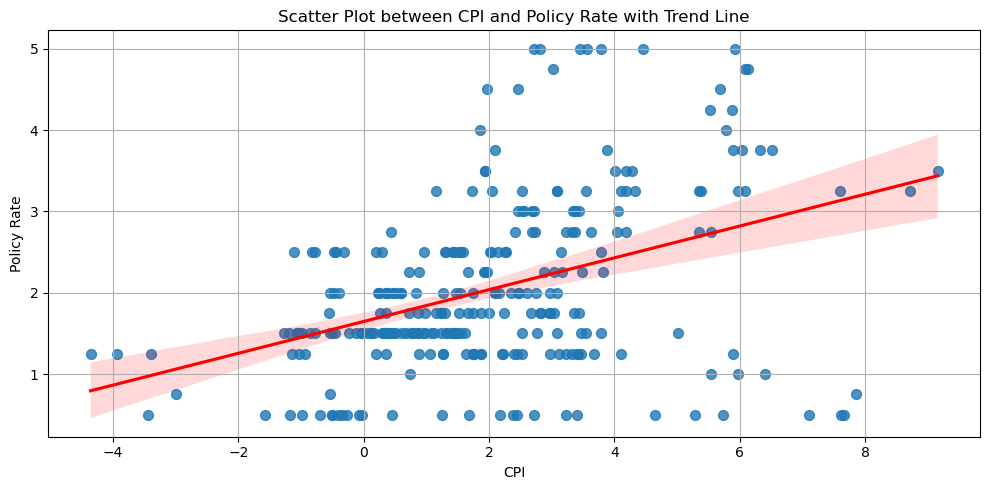

In [8]:
plt.figure(figsize=(10, 5))
sns.regplot(x='cpi', y='policy_rate', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter Plot between CPI and Policy Rate with Trend Line')
plt.xlabel('CPI')
plt.ylabel('Policy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot the histogram of Policy Rate

Check the frequency of policy rate, we can see the most of the policy rate is below 2%, which is tend to be a ease policy.

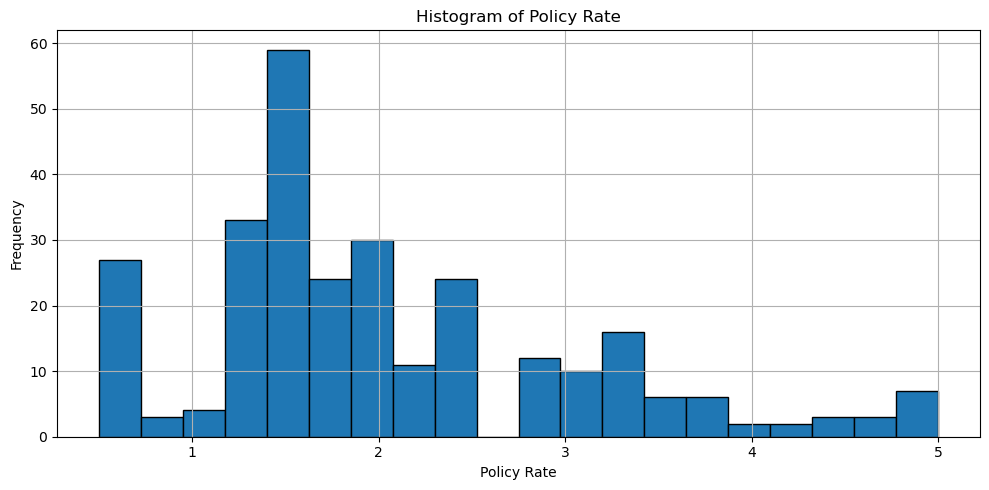

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df['policy_rate'], bins=20, edgecolor='black')
plt.title('Histogram of Policy Rate')
plt.xlabel('Policy Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Plot the stacked 100% bar chart of Inflation Target

We can see the inflation is fluctuating, and the inflation may often out of the range of inflation target.  
However we can the reverting, whenver it is outrange, the next period will be more inrange.

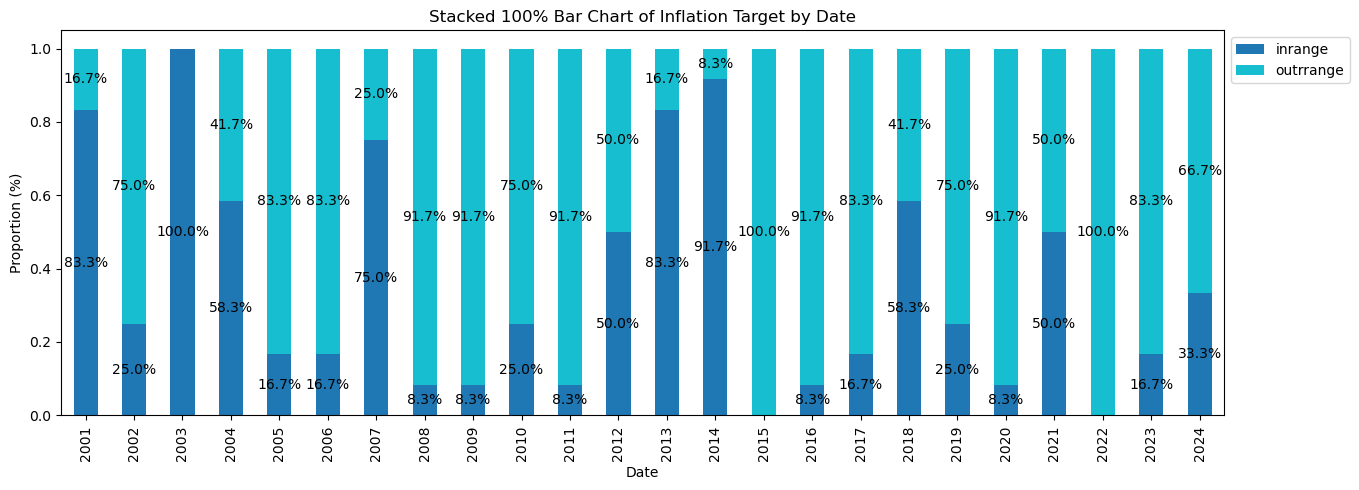

In [10]:
# Create a contingency table
cross_tab_prop = pd.crosstab(index=df['year'],
                             columns=df['inflation_target'],
                             normalize="index")

# Plot the stacked 100% bar chart
ax = cross_tab_prop.plot(
    stacked=True, 
    kind='bar', 
    colormap='tab10', 
    figsize=(15, 5)
)

plt.title('Stacked 100% Bar Chart of Inflation Target by Date')
plt.legend(title='Inflation Target')
plt.xlabel('Date')
plt.ylabel("Proportion (%)")

# Add percentage labels
for c in ax.containers:
    labels = [f'{v * 100:.1f}%' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Check composition of Monetary Policy

Tend to be a ease policy.

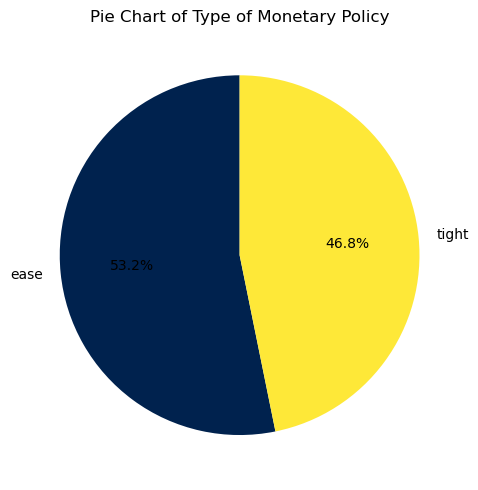

In [11]:
# Get the counts of each type of monetary policy
monetary_policy_counts = df['type_of_monetary_policy'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
monetary_policy_counts.plot.pie(autopct='%1.1f%%', startangle=90, colormap='cividis')
plt.title('Pie Chart of Type of Monetary Policy')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.show()

## Summarize

In conclusion, the stability of Thailand is quite strong, as we can see the NEER is going to be stronger.  
Morever the inflation is not too high, and the monetary policy is ease, which is a good policy for the economy.